In [37]:
import pandas as pd 
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
words=pd.read_csv("names.csv")
en_words=open("names.txt","r").read().splitlines()
words

gender        in_en  in_am
0         m         Aron    አሮን
1         m       Abdeel  ዐብድኤል
2         m         Abel    አቤል
3         m        Abida   አቢዳጽ
4         m       Abidan   አቢዳን
...     ...          ...    ...
1189      f       Zilpah    ዘለፋ
1190      e         Zina     ዚዛ
1191      f      Zippora    ሲፓራ
1192      e       Zuriel   ሱሪኤል
1193      m  Zurishaddai  ሱሪሰዳይ

[1194 rows x 3 columns]

In [39]:
print(words[:10])
print(len(words))

  gender    in_en  in_am
0      m     Aron    አሮን
1      m   Abdeel  ዐብድኤል
2      m     Abel    አቤል
3      m    Abida   አቢዳጽ
4      m   Abidan   አቢዳን
5      e    Abiel   አቢኤል
6      m  Abiezer  አቢአዝር
7      m  Abigail   አቢግያ
8      e  Abihail  አቢካኢል
9      e   Abijah    አቢያ
1194


In [40]:
print(min( len(w) for w in words["in_am"]))
print(max( len(w) for w in words["in_am"]))

2
10


very simple and weak LM 


Bigram (one character predicts the next one with a lookup table of counts)

In [41]:
am_words=words["in_am"].tolist()

In [42]:
am_words

['አሮን',
 'ዐብድኤል',
 'አቤል',
 'አቢዳጽ',
 'አቢዳን',
 'አቢኤል',
 'አቢአዝር',
 'አቢግያ',
 'አቢካኢል',
 'አቢያ',
 'አቤሮን',
 'አቢሳን',
 'አቢሳ',
 'አቢሱ',
 'አቢጣል',
 'አበኔር',
 'አብርሃም',
 'አብራም',
 'አቤሴሎም',
 'ዓዳ',
 'በርያ',
 'አዳም',
 'ሐዲ',
 'ዓዲዔል',
 'ዓዲን',
 'አዲና',
 'ዓድና',
 'አዶኒቤዜቅ',
 'አዶንያስ',
 'ኤስድሪኤል',
 'ኤንያ',
 'አክዓብ',
 'አሕላይ',
 'አኪም',
 'ዓሌሜት',
 'አሌክስንድሮስ',
 'ኤልሞዳድ',
 'ዓልዋን',
 'አማርያ',
 'ዓማስያ',
 'አሜስያስ',
 'ዓሚኤል',
 'አሞጽ',
 'አሞጽ',
 'አምራፌል',
 'አማሲ',
 'ዓና',
 'ሓናንያ',
 'ሓናንያ',
 'አንድርያስ',
 'አንዲራኒቆ',
 'ሓና',
 'አጵሎስ',
 'አፍብያ',
 'አቂላ',
 'አርዶን',
 'አርኤሊ',
 'አርኤል',
 'ሄርሞን',
 'አርጢሞን',
 'አርጤምስ',
 'አሳ',
 'አሳፍ',
 'አሣርኤል',
 'አሽርኤላ',
 'ዓክሳ',
 'አስናት',
 'አሽቤዓ',
 'አሴር',
 'አስታሮት',
 'ምዕራፍ',
 'ዓሢኤል',
 'አሥሪኤል',
 'ዓጣራ',
 'ጎቶልያ',
 'አውግስጦስ',
 'ኤዜልያስ',
 'አዛንያ',
 'ኤዝርኤል',
 'አዛርኤል',
 'ዓዛርያስ',
 'ዓዛዝያ',
 'ኤሴል',
 'ዓዝዔል',
 'ዓዝርኤል',
 'ሖዛ',
 'አባተ',
 'አባይ',
 'አባይነህ',
 'አብደላ',
 'አብዲ',
 'አብዱ',
 'አብዱል',
 'አብዱላሂ',
 'አበበ',
 'አበጋዝ',
 'አቤል',
 'አብነት',
 'አቤነዘር',
 'አበራ',
 'አብይ',
 'አቡበከር',
 'አዳነ',
 'አዲሱ',
 'አድማሱ',
 'አዱኛ',
 'አፍወርቅ',
 'አህመድ',
 'አካሉ',
 'አክሊሉ',
 'አላዛር',
 'አለባቸው

In [43]:
b={}
for w in am_words:
    chs=["<S>"]+list(w)+["<E>"]
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2) # for counting we use bigram method
        b[bigram]=b.get(bigram,0)+1
b

{('<S>', 'አ'): 161,
 ('አ', 'ሮ'): 2,
 ('ሮ', 'ን'): 10,
 ('ን', '<E>'): 119,
 ('<S>', 'ዐ'): 1,
 ('ዐ', 'ብ'): 1,
 ('ብ', 'ድ'): 3,
 ('ድ', 'ኤ'): 3,
 ('ኤ', 'ል'): 89,
 ('ል', '<E>'): 113,
 ('አ', 'ቤ'): 6,
 ('ቤ', 'ል'): 7,
 ('አ', 'ቢ'): 14,
 ('ቢ', 'ዳ'): 3,
 ('ዳ', 'ጽ'): 1,
 ('ጽ', '<E>'): 5,
 ('ዳ', 'ን'): 8,
 ('ቢ', 'ኤ'): 1,
 ('ቢ', 'አ'): 1,
 ('አ', 'ዝ'): 1,
 ('ዝ', 'ር'): 3,
 ('ር', '<E>'): 45,
 ('ቢ', 'ግ'): 1,
 ('ግ', 'ያ'): 3,
 ('ያ', '<E>'): 103,
 ('ቢ', 'ካ'): 1,
 ('ካ', 'ኢ'): 1,
 ('ኢ', 'ል'): 1,
 ('ቢ', 'ያ'): 2,
 ('ቤ', 'ሮ'): 1,
 ('ቢ', 'ሳ'): 2,
 ('ሳ', 'ን'): 3,
 ('ሳ', '<E>'): 12,
 ('ቢ', 'ሱ'): 1,
 ('ሱ', '<E>'): 7,
 ('ቢ', 'ጣ'): 1,
 ('ጣ', 'ል'): 2,
 ('አ', 'በ'): 10,
 ('በ', 'ኔ'): 1,
 ('ኔ', 'ር'): 2,
 ('አ', 'ብ'): 13,
 ('ብ', 'ር'): 4,
 ('ር', 'ሃ'): 1,
 ('ሃ', 'ም'): 1,
 ('ም', '<E>'): 60,
 ('ብ', 'ራ'): 6,
 ('ራ', 'ም'): 7,
 ('ቤ', 'ሴ'): 2,
 ('ሴ', 'ሎ'): 3,
 ('ሎ', 'ም'): 2,
 ('<S>', 'ዓ'): 18,
 ('ዓ', 'ዳ'): 3,
 ('ዳ', '<E>'): 14,
 ('<S>', 'በ'): 27,
 ('በ', 'ር'): 7,
 ('ር', 'ያ'): 19,
 ('አ', 'ዳ'): 3,
 ('ዳ', 'ም'): 1,
 ('<S>', 'ሐ'): 10,
 ('ሐ', 

In [44]:
sorted(b.items(), key=lambda kv: -kv[1]) # decending

[(('<S>', 'አ'), 161),
 (('ን', '<E>'), 119),
 (('ስ', '<E>'), 117),
 (('ል', '<E>'), 113),
 (('ያ', '<E>'), 103),
 (('ኤ', 'ል'), 89),
 (('ት', '<E>'), 67),
 (('ም', '<E>'), 60),
 (('<S>', 'ኤ'), 57),
 (('ር', '<E>'), 45),
 (('<S>', 'ሰ'), 43),
 (('ይ', '<E>'), 39),
 (('<S>', 'ኢ'), 36),
 (('<S>', 'መ'), 33),
 (('<S>', 'ይ'), 32),
 (('<S>', 'በ'), 27),
 (('ላ', '<E>'), 27),
 (('<S>', 'ያ'), 27),
 (('<S>', 'ማ'), 27),
 (('ና', '<E>'), 26),
 (('<S>', 'ዮ'), 26),
 (('ያ', 'ስ'), 25),
 (('<S>', 'እ'), 25),
 (('ራ', '<E>'), 24),
 (('ው', '<E>'), 24),
 (('<S>', 'ሳ'), 23),
 (('ድ', '<E>'), 20),
 (('ር', 'ያ'), 19),
 (('ን', 'ያ'), 19),
 (('<S>', 'ዓ'), 18),
 (('ብ', '<E>'), 17),
 (('ማ', '<E>'), 17),
 (('<S>', 'ደ'), 15),
 (('<S>', 'ሚ'), 15),
 (('<S>', 'ና'), 15),
 (('አ', 'ቢ'), 14),
 (('ዳ', '<E>'), 14),
 (('ማ', 'ር'), 14),
 (('ሽ', '<E>'), 14),
 (('<S>', 'ቤ'), 14),
 (('<S>', 'ገ'), 14),
 (('<S>', 'የ'), 14),
 (('<S>', 'ነ'), 14),
 (('አ', 'ብ'), 13),
 (('ቅ', '<E>'), 13),
 (('አ', 'ስ'), 13),
 (('ሪ', '<E>'), 13),
 (('ዮ', 'ስ'), 13),
 (('<

store this information in the 2d array

In [65]:
N=torch.zeros((188,188),dtype=torch.int32) # int32 cause we are counting
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [66]:
chars=sorted(list(set("".join(am_words))))  # set wont allow duplication
stoi={s:i+1 for i,s in enumerate(chars)}  #string to index
stoi["-"]=1
stoi["."]=0
stoi

{'-': 1,
 'ሀ': 2,
 'ሁ': 3,
 'ሂ': 4,
 'ሃ': 5,
 'ሄ': 6,
 'ህ': 7,
 'ሆ': 8,
 'ለ': 9,
 'ሉ': 10,
 'ሊ': 11,
 'ላ': 12,
 'ሌ': 13,
 'ል': 14,
 'ሎ': 15,
 'ሐ': 16,
 'ሑ': 17,
 'ሒ': 18,
 'ሓ': 19,
 'ሔ': 20,
 'ሕ': 21,
 'ሖ': 22,
 'መ': 23,
 'ሙ': 24,
 'ሚ': 25,
 'ማ': 26,
 'ሜ': 27,
 'ም': 28,
 'ሞ': 29,
 'ሟ': 30,
 'ሠ': 31,
 'ሡ': 32,
 'ሢ': 33,
 'ሣ': 34,
 'ሥ': 35,
 'ሦ': 36,
 'ረ': 37,
 'ሩ': 38,
 'ሪ': 39,
 'ራ': 40,
 'ሬ': 41,
 'ር': 42,
 'ሮ': 43,
 'ሰ': 44,
 'ሱ': 45,
 'ሲ': 46,
 'ሳ': 47,
 'ሴ': 48,
 'ስ': 49,
 'ሶ': 50,
 'ሸ': 51,
 'ሹ': 52,
 'ሺ': 53,
 'ሻ': 54,
 'ሼ': 55,
 'ሽ': 56,
 'ሾ': 57,
 'ቀ': 58,
 'ቁ': 59,
 'ቂ': 60,
 'ቃ': 61,
 'ቄ': 62,
 'ቅ': 63,
 'ቆ': 64,
 'በ': 65,
 'ቡ': 66,
 'ቢ': 67,
 'ባ': 68,
 'ቤ': 69,
 'ብ': 70,
 'ቦ': 71,
 'ቨ': 72,
 'ተ': 73,
 'ቱ': 74,
 'ቲ': 75,
 'ታ': 76,
 'ቴ': 77,
 'ት': 78,
 'ቶ': 79,
 'ቸ': 80,
 'ቹ': 81,
 'ቻ': 82,
 'ች': 83,
 'ኃ': 84,
 'ኅ': 85,
 'ነ': 86,
 'ኑ': 87,
 'ኒ': 88,
 'ና': 89,
 'ኔ': 90,
 'ን': 91,
 'ኖ': 92,
 'ኘ': 93,
 'ኛ': 94,
 'ኝ': 95,
 'ኞ': 96,
 'አ': 97,
 'ኡ': 98,
 'ኢ': 99,
 'ኤ': 100,
 'እ': 10

In [67]:
for word in am_words:
    chs=["."]+list(word)+["."]
    for ch1,ch2 in zip(chs,chs[1:]):
        idx1=stoi[ch1]
        idx2=stoi[ch2]
        N[idx1,idx2]+=1

In [68]:
itos= {i:s for s,i in stoi.items()}#index to string
itos

{1: '-',
 2: 'ሀ',
 3: 'ሁ',
 4: 'ሂ',
 5: 'ሃ',
 6: 'ሄ',
 7: 'ህ',
 8: 'ሆ',
 9: 'ለ',
 10: 'ሉ',
 11: 'ሊ',
 12: 'ላ',
 13: 'ሌ',
 14: 'ል',
 15: 'ሎ',
 16: 'ሐ',
 17: 'ሑ',
 18: 'ሒ',
 19: 'ሓ',
 20: 'ሔ',
 21: 'ሕ',
 22: 'ሖ',
 23: 'መ',
 24: 'ሙ',
 25: 'ሚ',
 26: 'ማ',
 27: 'ሜ',
 28: 'ም',
 29: 'ሞ',
 30: 'ሟ',
 31: 'ሠ',
 32: 'ሡ',
 33: 'ሢ',
 34: 'ሣ',
 35: 'ሥ',
 36: 'ሦ',
 37: 'ረ',
 38: 'ሩ',
 39: 'ሪ',
 40: 'ራ',
 41: 'ሬ',
 42: 'ር',
 43: 'ሮ',
 44: 'ሰ',
 45: 'ሱ',
 46: 'ሲ',
 47: 'ሳ',
 48: 'ሴ',
 49: 'ስ',
 50: 'ሶ',
 51: 'ሸ',
 52: 'ሹ',
 53: 'ሺ',
 54: 'ሻ',
 55: 'ሼ',
 56: 'ሽ',
 57: 'ሾ',
 58: 'ቀ',
 59: 'ቁ',
 60: 'ቂ',
 61: 'ቃ',
 62: 'ቄ',
 63: 'ቅ',
 64: 'ቆ',
 65: 'በ',
 66: 'ቡ',
 67: 'ቢ',
 68: 'ባ',
 69: 'ቤ',
 70: 'ብ',
 71: 'ቦ',
 72: 'ቨ',
 73: 'ተ',
 74: 'ቱ',
 75: 'ቲ',
 76: 'ታ',
 77: 'ቴ',
 78: 'ት',
 79: 'ቶ',
 80: 'ቸ',
 81: 'ቹ',
 82: 'ቻ',
 83: 'ች',
 84: 'ኃ',
 85: 'ኅ',
 86: 'ነ',
 87: 'ኑ',
 88: 'ኒ',
 89: 'ና',
 90: 'ኔ',
 91: 'ን',
 92: 'ኖ',
 93: 'ኘ',
 94: 'ኛ',
 95: 'ኝ',
 96: 'ኞ',
 97: 'አ',
 98: 'ኡ',
 99: 'ኢ',
 100: 'ኤ',
 101: 'እ

In [69]:
from matplotlib import font_manager
font_manager.fontManager.addfont("NotoSansEthiopic-Regular.ttf")

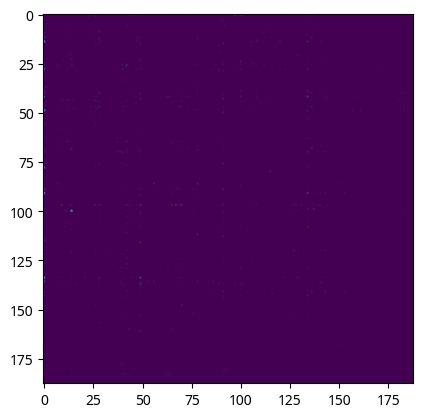

In [70]:
plt.imshow(N)

In [71]:
plt.close("all")

(np.float64(-0.5), np.float64(187.5), np.float64(187.5), np.float64(-0.5))

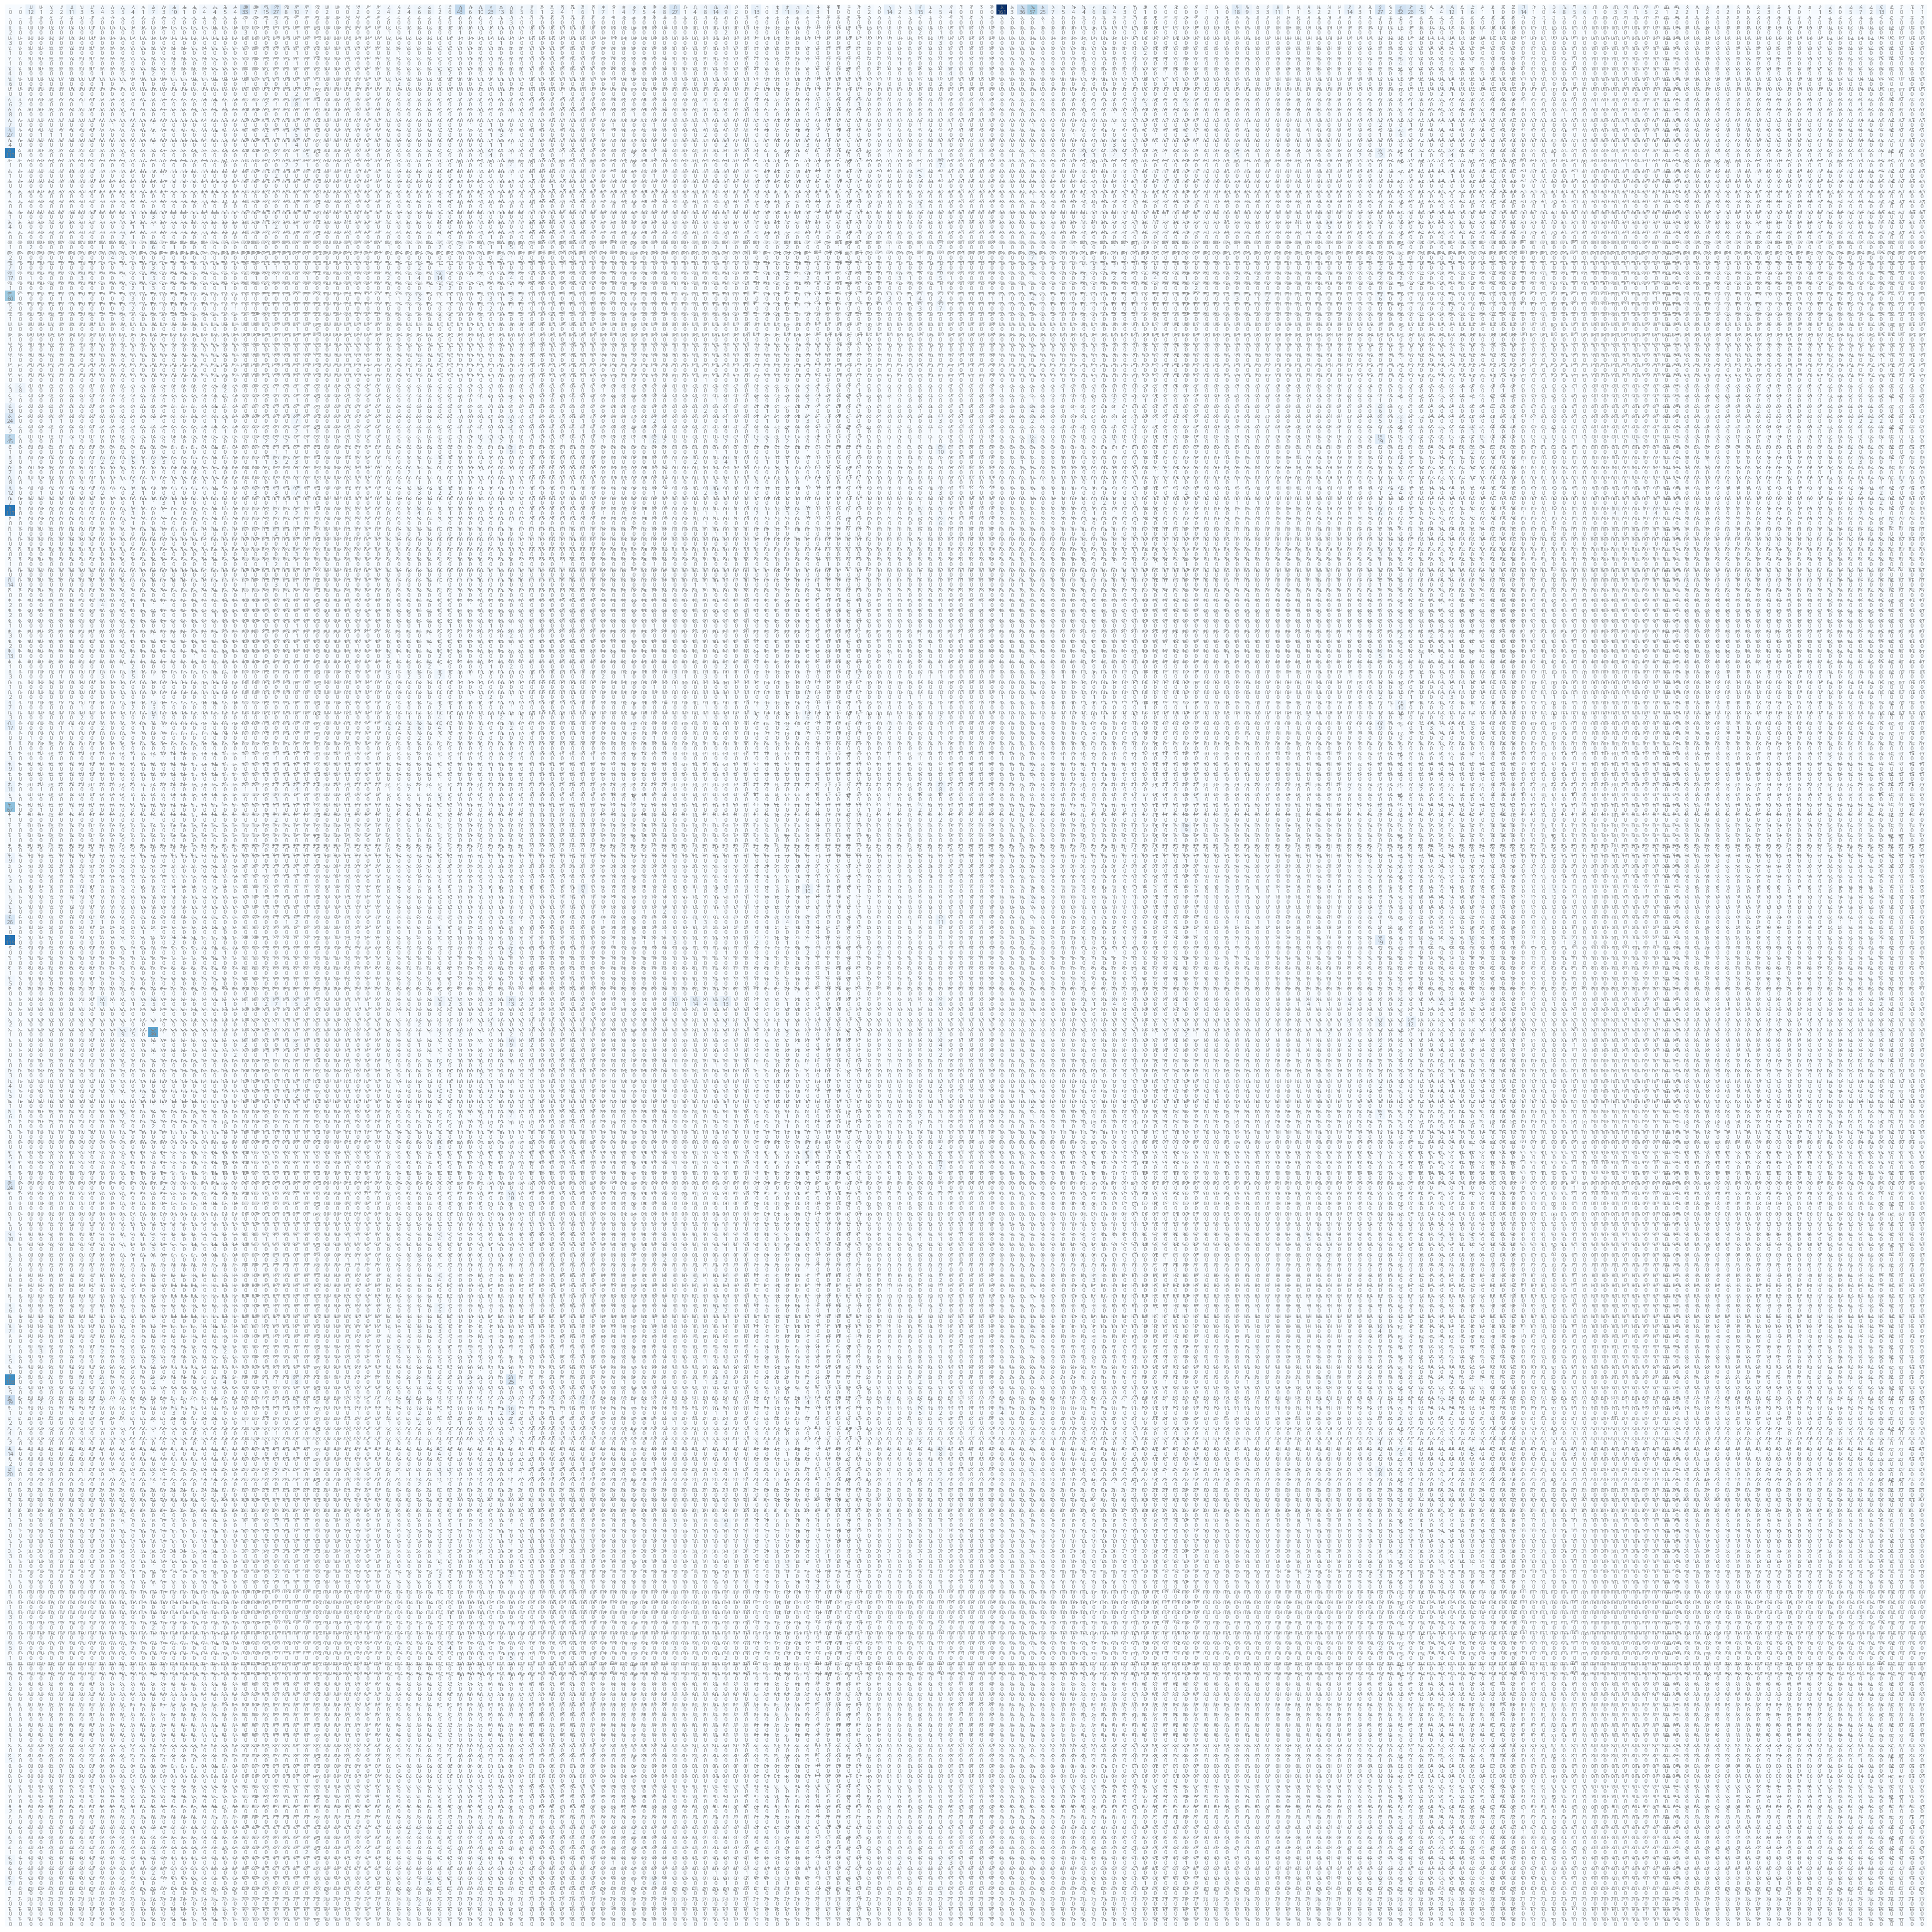

In [72]:
plt.rcParams["font.family"]="Noto Sans Ethiopic"
plt.figure(figsize=(50,50))
plt.imshow(N,cmap="Blues")
for i in range(188):
    for j in range(188):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray",fontsize=7)
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray",fontsize=8)
plt.axis("off")

In [103]:
# torch manual seed rand generator #EX
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
print(p)
#normalize
p=p/p.sum()
print(p)

#To randomly sample indices from a given probability distribution
torch.multinomial(p,num_samples=50,replacement=True,generator=g)

tensor([0.7081, 0.3542, 0.1054])
tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2])

In [81]:
pr=N[0].float() # first row
pr=pr/pr.sum() # create the probability distribution
pr

tensor([0.0000, 0.0000, 0.0101, 0.0008, 0.0017, 0.0017, 0.0092, 0.0025, 0.0042,
        0.0034, 0.0025, 0.0042, 0.0034, 0.0008, 0.0059, 0.0025, 0.0084, 0.0008,
        0.0000, 0.0034, 0.0034, 0.0042, 0.0034, 0.0276, 0.0059, 0.0126, 0.0226,
        0.0067, 0.0084, 0.0059, 0.0000, 0.0017, 0.0000, 0.0000, 0.0017, 0.0000,
        0.0017, 0.0034, 0.0017, 0.0034, 0.0050, 0.0067, 0.0017, 0.0050, 0.0360,
        0.0050, 0.0084, 0.0193, 0.0109, 0.0067, 0.0042, 0.0050, 0.0008, 0.0017,
        0.0034, 0.0008, 0.0050, 0.0008, 0.0059, 0.0008, 0.0034, 0.0059, 0.0042,
        0.0034, 0.0067, 0.0226, 0.0008, 0.0034, 0.0067, 0.0117, 0.0075, 0.0017,
        0.0000, 0.0109, 0.0000, 0.0025, 0.0092, 0.0075, 0.0050, 0.0025, 0.0008,
        0.0000, 0.0000, 0.0000, 0.0017, 0.0000, 0.0117, 0.0017, 0.0025, 0.0126,
        0.0034, 0.0042, 0.0034, 0.0000, 0.0000, 0.0000, 0.0000, 0.1348, 0.0025,
        0.0302, 0.0477, 0.0209, 0.0059, 0.0042, 0.0034, 0.0034, 0.0050, 0.0067,
        0.0034, 0.0025, 0.0000, 0.0008, 

In [82]:
sum(pr)

tensor(1.)

In [108]:
g=torch.Generator().manual_seed(2147483647)
idx=torch.multinomial(pr,num_samples=1,replacement=True,generator=g).item()
itos[idx] #from the first row this has 'ሳ' has the highest pr to begin first

'ሳ'

In [119]:
g=torch.Generator().manual_seed(2147483647)
for i in range(20):     
    out=[]
    ix=0
    while True:
        p=N[ix].float()
        p=p/p.sum()
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:  # end token
            break
    print("".join(out))

ሳም.
ዕቆስ.
ድዩልያቤጥሩ.
ሐና.
ሄኖዓዛር.
ቲቶ.
ዓርቅ.
ደምን.
አስያ.
ከነህመስ.
ሬኔልዩልነት.
ፊዓዛር.
አሽ.
ሳቤር.
ሀናባይ.
ሲ.
ሚኬር.
ኢራምና.
ዑዝርቆላዊ.
ጢፋኒኤልጋቸው.


bigram lanuage model is actually terrible 